#  Kaggle Project
### --Sirjana Yadav



## Predict Health Outcomes of Horses

* Dataset achieved from Kaggle : https://www.kaggle.com/competitions/playground-series-s3e22/overview
##### Project Goal
The goal of the project is to predict the health outcomes of horses, by building a multiclass model that, given a series of clinical observations, predicts whether a horse will lived, died, or be euthanized. Success is measured by the micro-averaged F1-score on the held-out test set, rewarding balanced performance across all three outcomes.

##### Data overview

* Training set: ~1,235 rows and 29 columns (28 features + the outcome target).

* Test set: ~824 rows and 28 columns (same features- the target).

###### Features include:

* Numeric: vitals (temperature, pulse, respiratory rate), blood values (packed cell volume, total protein, abdominal fluid protein), and lesion codes.

* Binary : surgery, age, surgical lesion, CP data.

* Categorical exams: mucous membrane color, cap refill time, pain score, abdominal distention, nasogastric reflux, rectal feces appearance, etc. 



# Data Loading and Initial Look



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# loading the train dataset
df = pd.read_csv('train.csv')
df.head() #displaying 5 rows



,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
df.shape

(1235, 29)

In [4]:
df.duplicated().sum()


0

In [5]:
# checking for missing values
df_missing = df.isnull().sum()
df_missing

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [6]:
# checking the initial size of the train data
df.shape

(1235, 29)

In [7]:
# Since it is a dataset which consists of health data, Iwill be removing missing values instead of 
#replacing them for more realistic prediction
df = df.dropna(axis = 0, how='any')
df_new_missing = df.isnull().sum()
df_new_missing

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [8]:
# size of the dataset after removing the missing missing values
df.shape

(771, 29)

In [9]:
df.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [10]:
# A display of summary with a table, where each row is a feature or collection of features
# I did exclude our target vrianle which was 'outcome'

summary = []
for col in df.columns.drop('outcome'):
    n_uniques = df[col].nunique()
    #  type
    if df[col].dtype == 'object':
        ftype = 'Binary' if n_uniques == 2 else 'Categorical'
    else:
        ftype = 'Numerical'
    summary.append((col, n_uniques, ftype))

# 3. Display
summary_df = pd.DataFrame(summary, columns=['feature','unique_count','type'])
summary_df


,feature,unique_count,type
0,id,771,Numerical
1,surgery,2,Binary
2,age,2,Binary
3,hospital_number,213,Numerical
4,rectal_temp,39,Numerical
5,pulse,49,Numerical
6,respiratory_rate,34,Numerical
7,temp_of_extremities,4,Categorical
8,peripheral_pulse,4,Categorical
9,mucous_membrane,6,Categorical


In [11]:
df.columns


Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [12]:
#1 identifiers = ['id', 'hospital_number']

# 2. Binary categoricals (exactly 2 distinct values)
binary= ['surgery','age','surgical_lesion','cp_data']

# 3. Multi-class categoricals (>2 distinct values)
categorical = ['temp_of_extremities',
'peripheral_pulse','mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention',
'nasogastric_tube','nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance']


# 4. Numericals (all the rest of the int/float columns, minus IDs & target)
numerical = ['rectal_temp','pulse','respiratory_rate','nasogastric_reflux_ph','packed_cell_volume',
'total_protein','abdomo_protein','lesion_1','lesion_2','lesion_3']

# 5. Target
target = ['outcome']

In [13]:
columns_to_remove = ['id', 'hospital_number']
df = df.drop(columns = columns_to_remove)

In [14]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,no,adult,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,depressed,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived


In [15]:
# I decided to do a boxplot and histogram to quickly eyeball the outlier issues

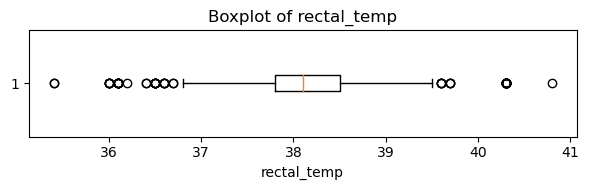

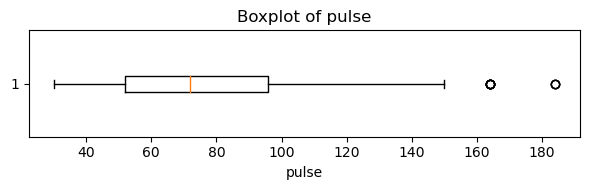

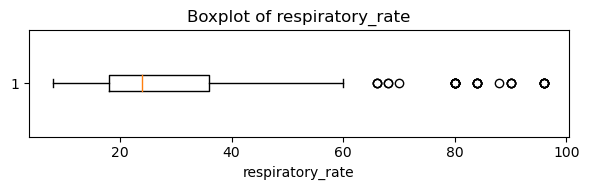

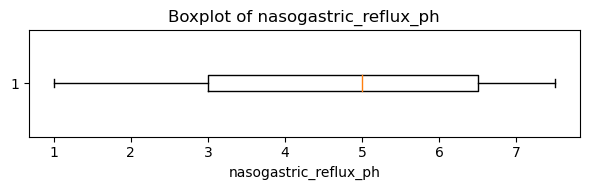

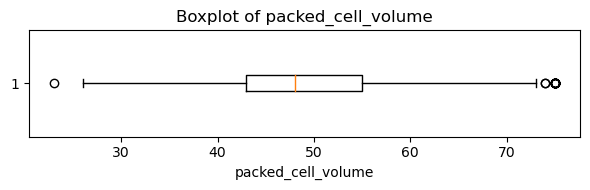

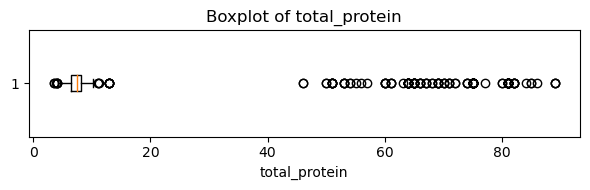

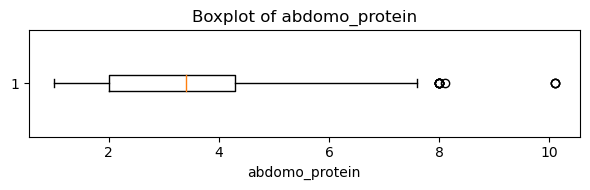

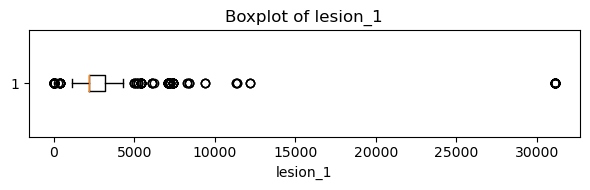

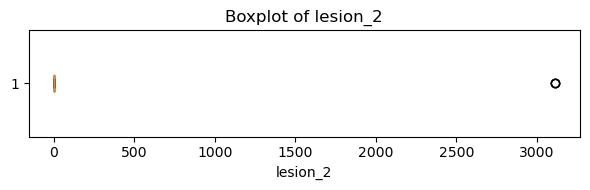

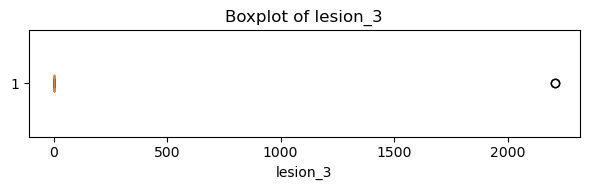

In [16]:

for feat in numerical:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[feat].dropna(), vert=False)
    plt.title(f'Boxplot of {feat}')
    plt.xlabel(feat)
    plt.tight_layout()
    plt.show()



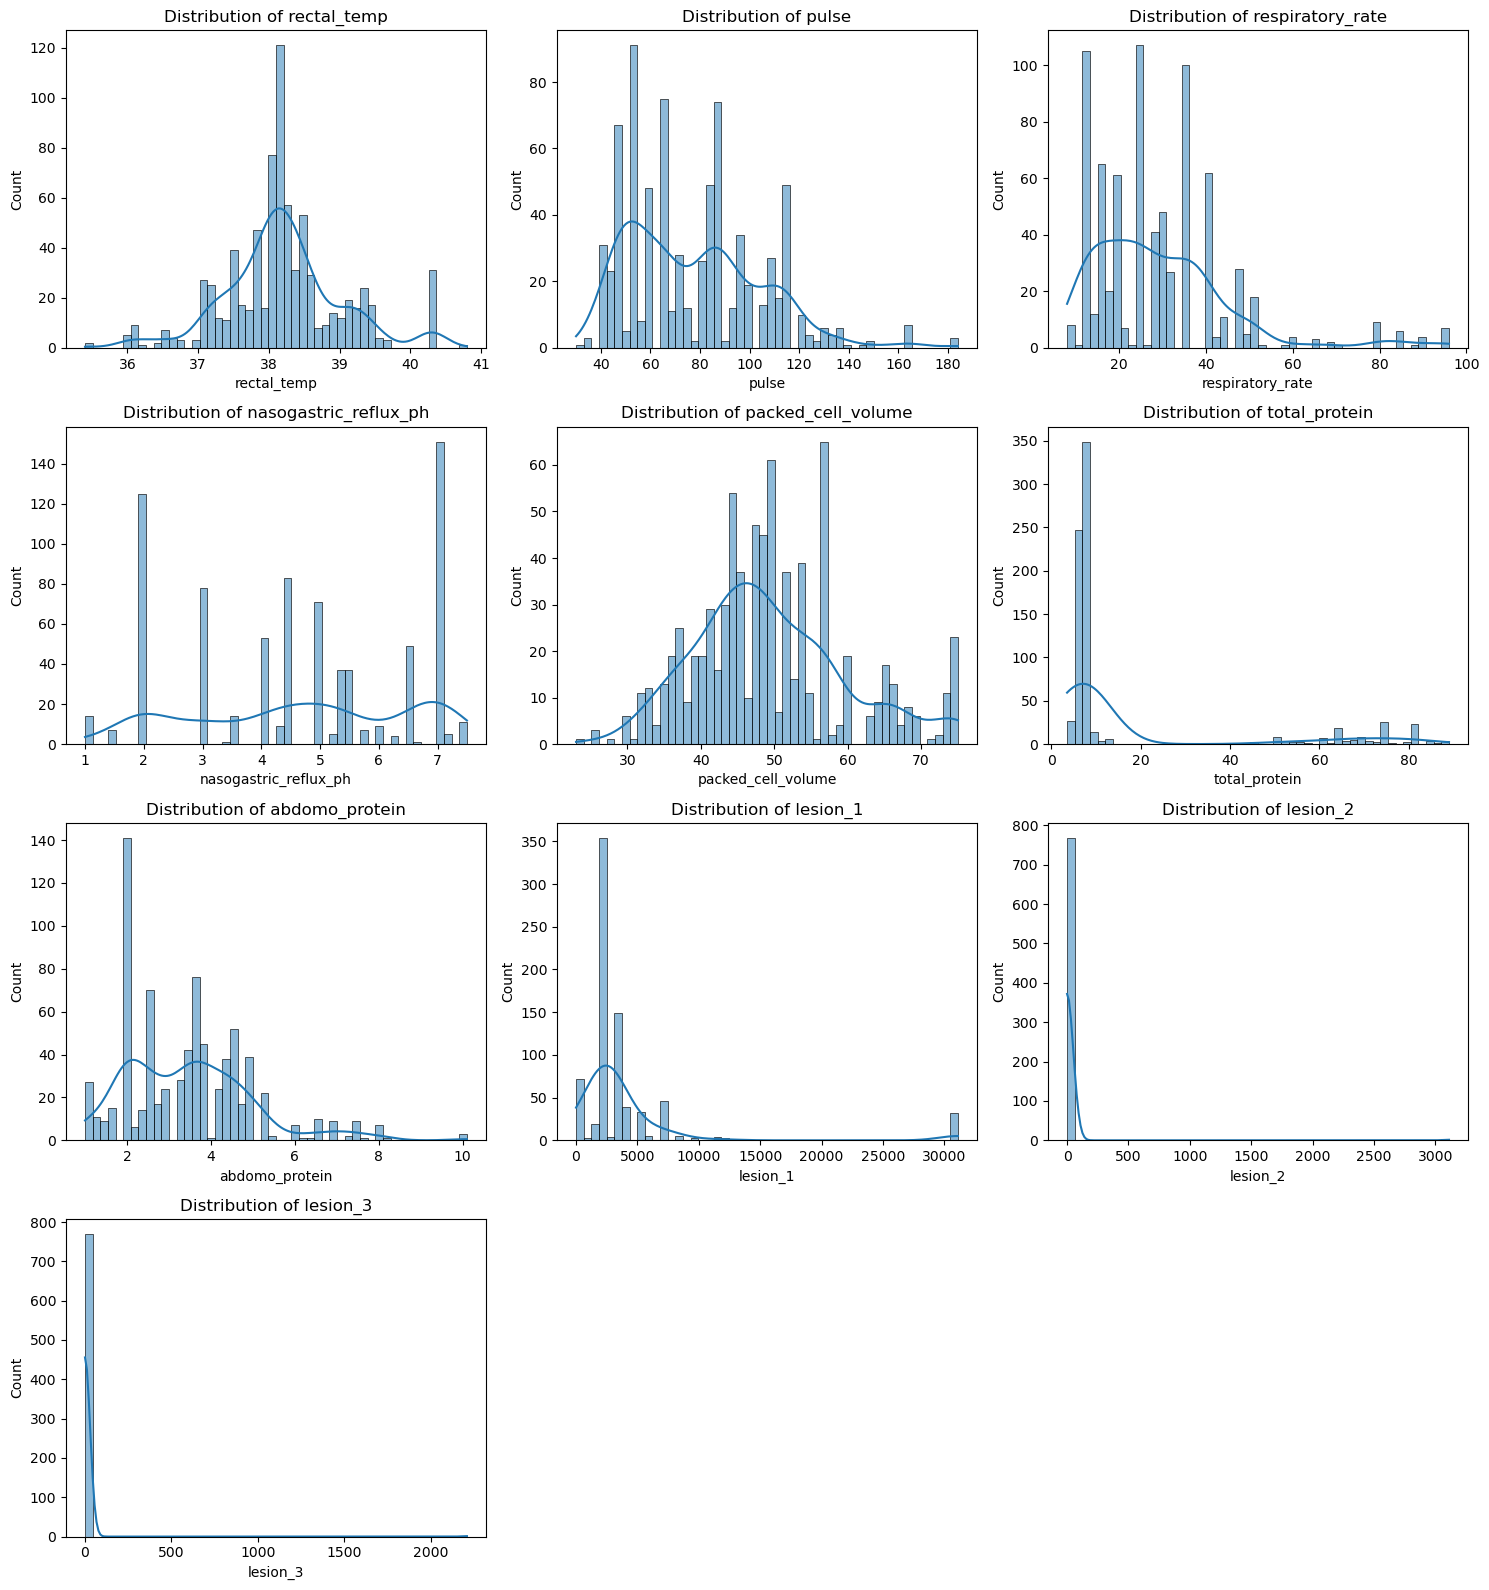

In [18]:
#  Histograms for outliers as well
# Doing more visualization to see how the values differ by outcome and also seeing
# whether any classes share nearly identical distributions
import math

features = numerical  
n = len(features)

ncols = 3
nrows = math.ceil(n / ncols)


fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
axes = axes.flatten()

for ax, feat in zip(axes, features):
    sns.histplot(data=df, x=feat, kde=True, bins=50, ax=ax)
    ax.set_title(f'Distribution of {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Count')

for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

# Data Visualization
   

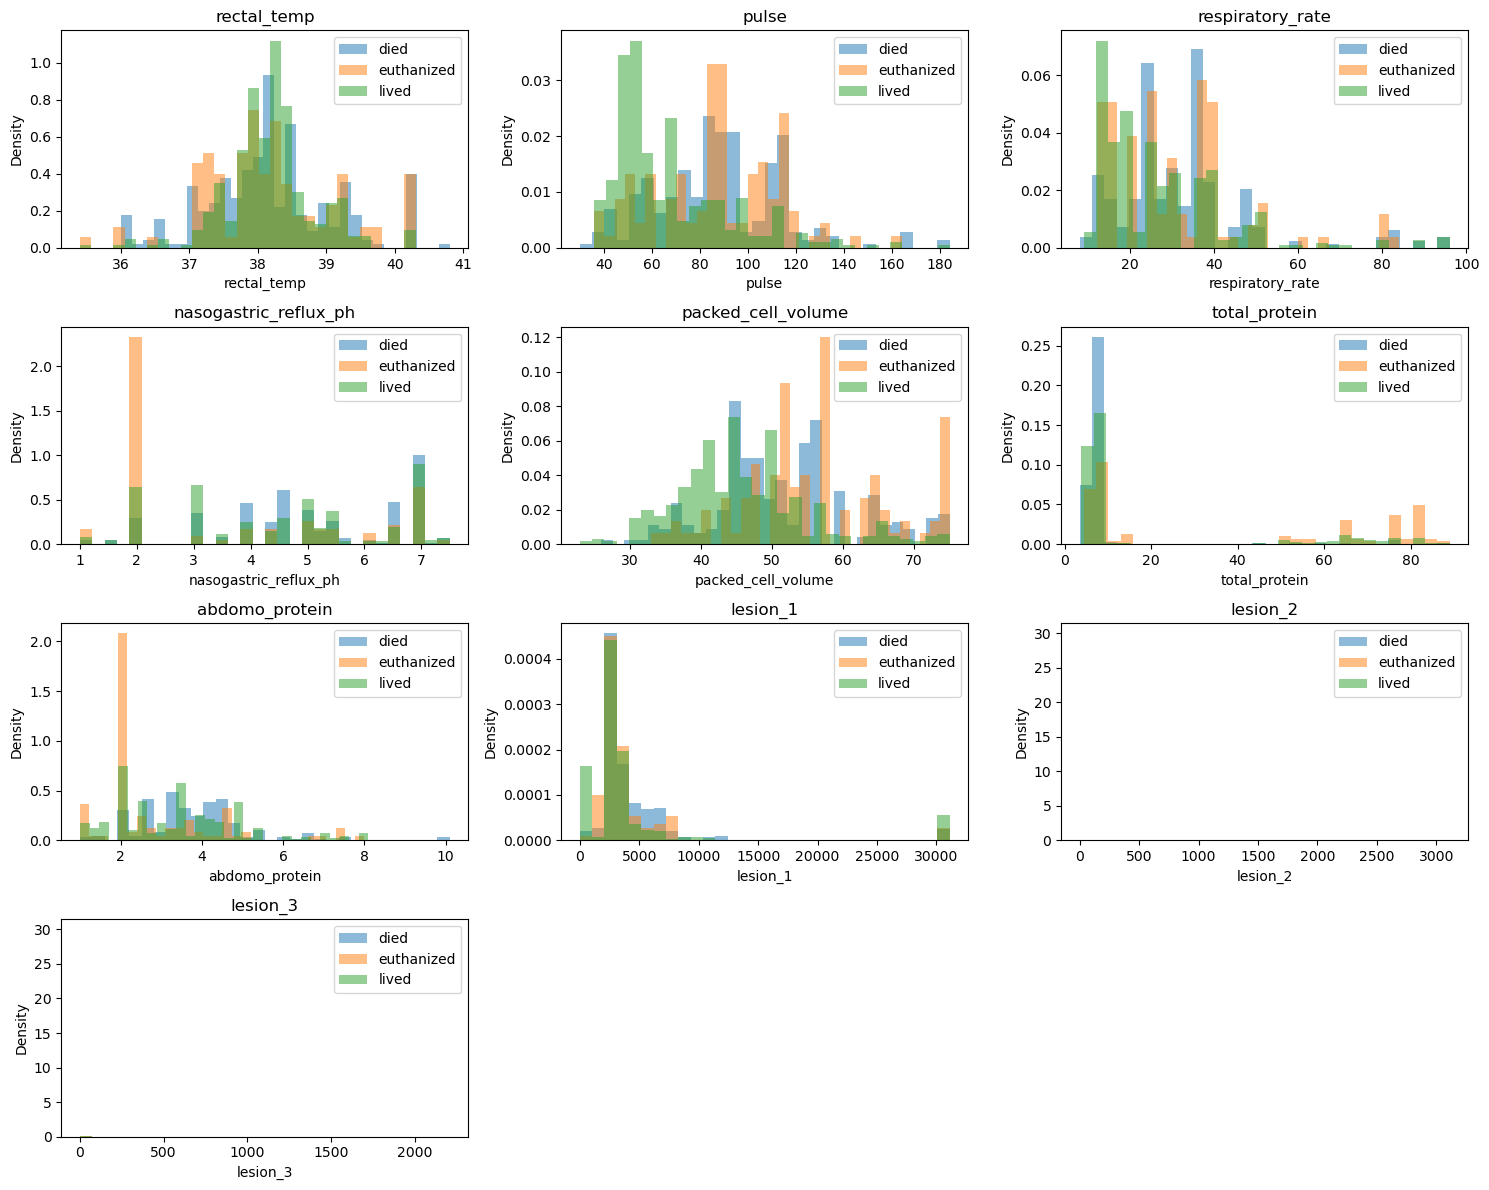

In [19]:
#comparing histogram of every feature between the classes based on the target variable

features = numerical  #  list of numeric feature names
n_features = len(features)

ncols = 3
nrows = math.ceil(n_features / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3), sharey=False)
axes = axes.flatten()

for idx, feat in enumerate(features):
    ax = axes[idx]
    for cls in df['outcome'].unique():# Target variable
        subset = df[df['outcome']==cls][feat].dropna()
        ax.hist(subset, bins=30, alpha=0.5, density=True, label=cls)
    ax.set_title(feat)
    ax.set_xlabel(feat)
    ax.set_ylabel('Density')
    ax.legend()

for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [20]:
# We can already visibly see how lesion 1 and 2 are not very important features to outcome and are so close to 0

In [21]:
# Categorical frequency tables
#table‑based view of how each categorical feature’s levels distribute across your target classes
for feat in categorical:
    freq = pd.crosstab(df[feat], df['outcome'])
    print(f"\n=== {feat} ===")
    print(freq)


=== temp_of_extremities ===
outcome              died  euthanized  lived
temp_of_extremities                         
cold                   39          10     19
cool                  196          87    172
normal                 36          10    170
warm                   10           0     22

=== peripheral_pulse ===
outcome           died  euthanized  lived
peripheral_pulse                         
absent               3           3      0
increased            1           0      1
normal              56          22    216
reduced            221          82    166

=== mucous_membrane ===
outcome          died  euthanized  lived
mucous_membrane                         
bright_pink        21           7     31
bright_red         64          18     63
dark_cyanotic      35          11     16
normal_pink        19          13    139
pale_cyanotic      81          39     46
pale_pink          61          19     88

=== capillary_refill_time ===
outcome                died  euthanized

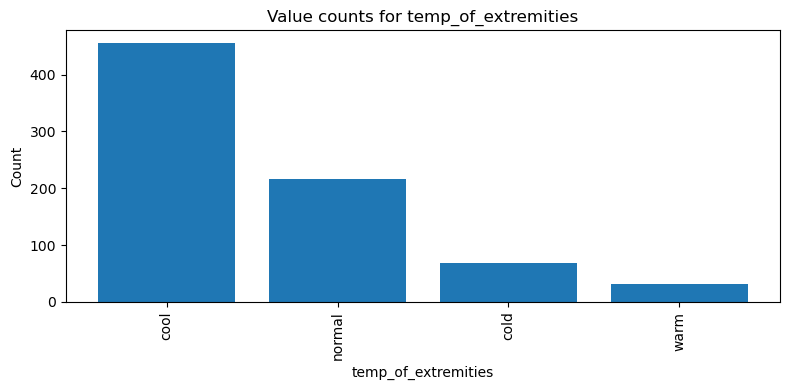

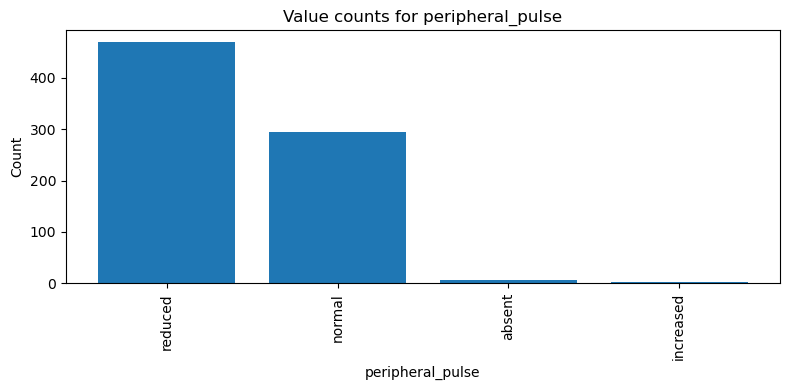

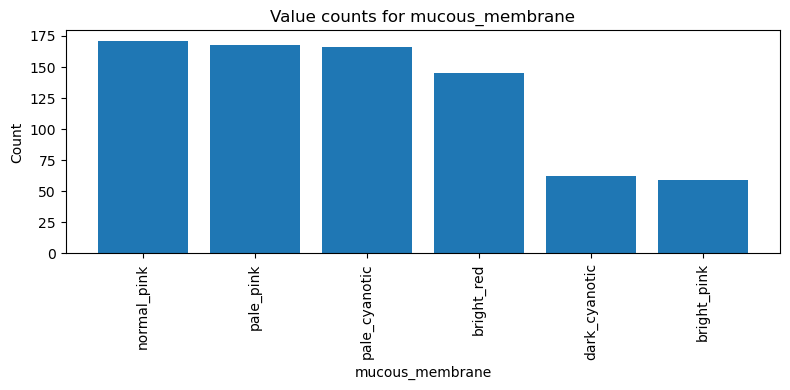

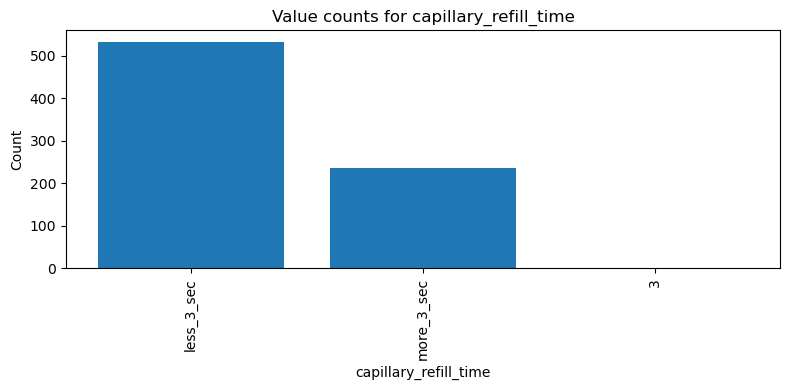

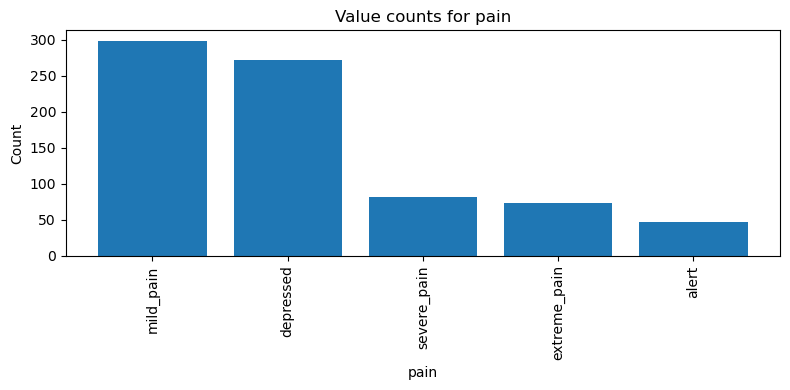

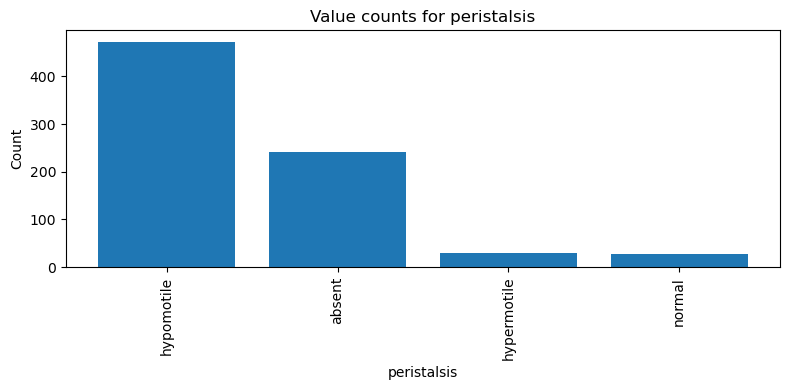

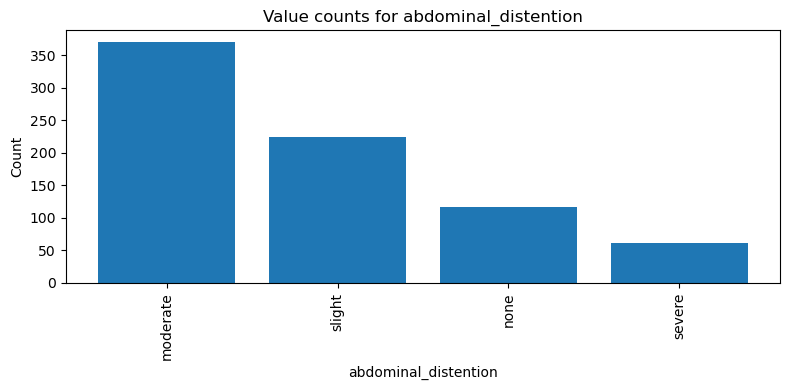

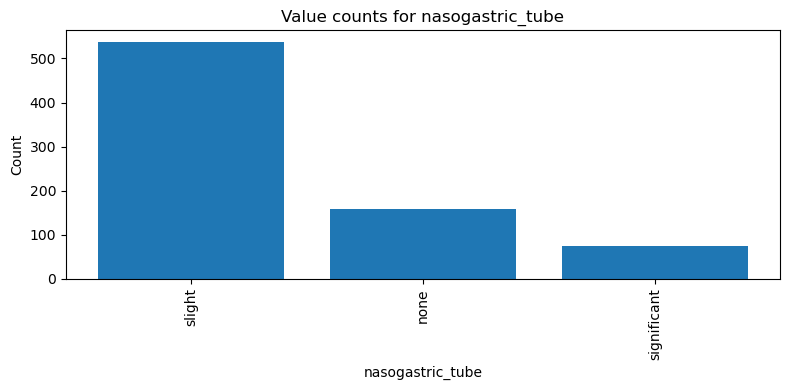

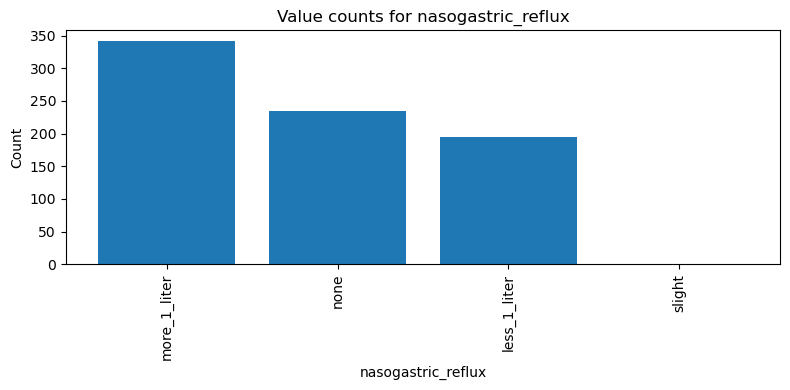

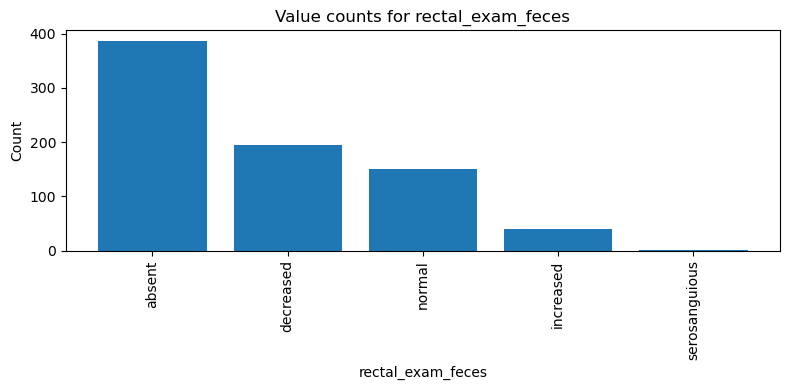

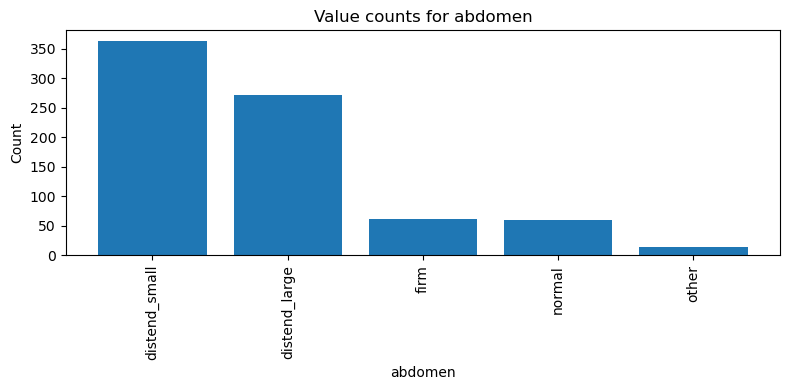

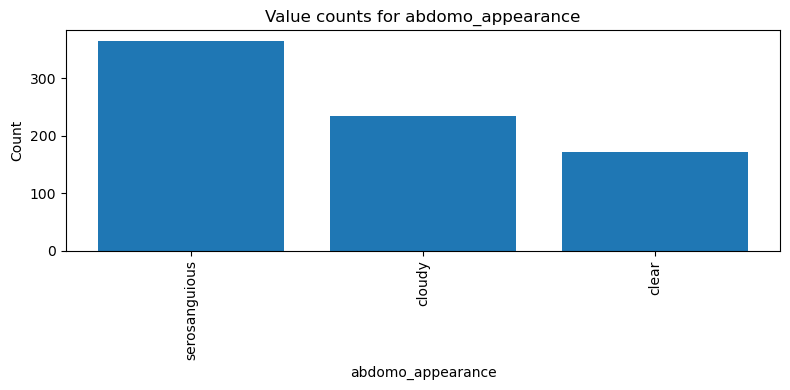

In [22]:
#I also just wanted to visualize the categorical columns
for feature in categorical:
    counts = df[feature].value_counts()
    labels = counts.index.astype(str)      #  making sure everything is a str 

    plt.figure(figsize=(8,4))
    plt.bar(labels, counts.values)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Value counts for {feature}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## Data Cleaning and Preperation for Machine Learning


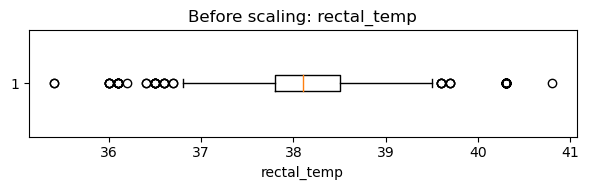

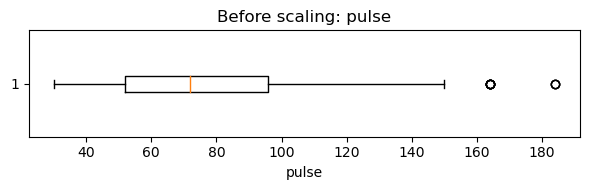

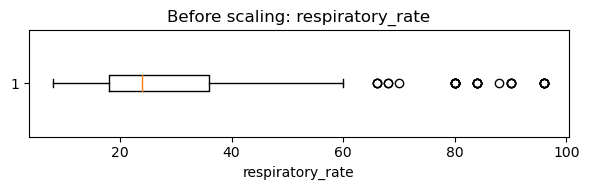

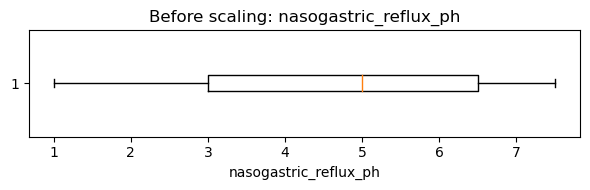

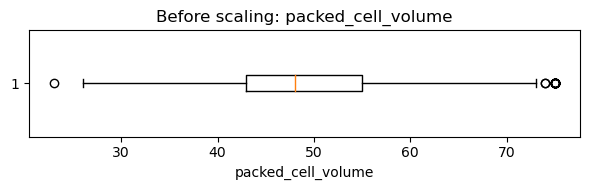

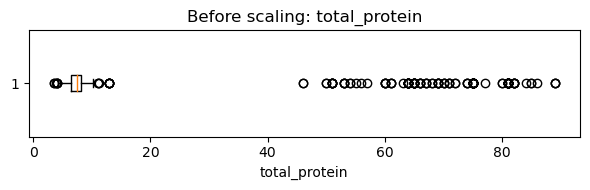

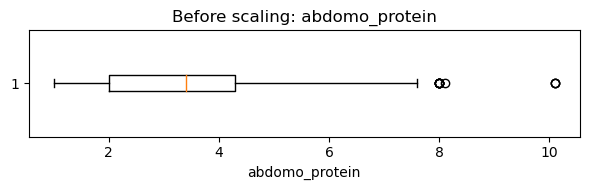

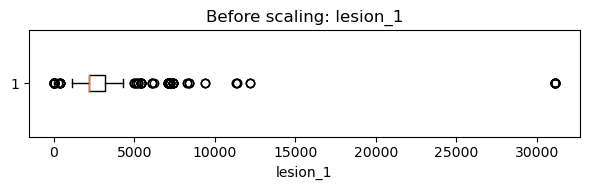

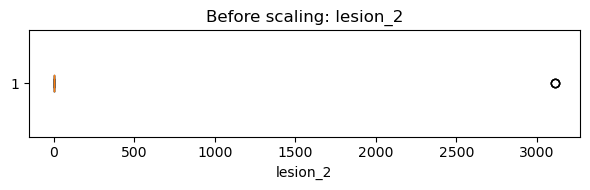

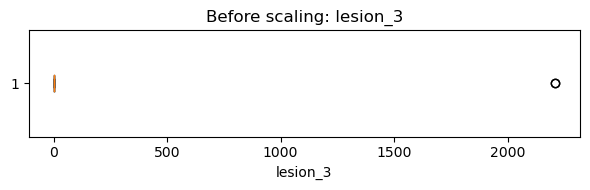

In [24]:
#   Standardize all categorical strings to lowercase
for c in categorical:
    df[c] = df[c].astype(str).str.strip().str.lower()

# Visualizing numeric features BEFORE 
for col in numerical:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Before scaling: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Scaling

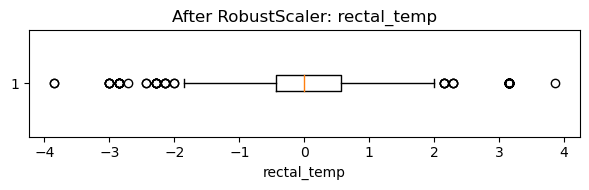

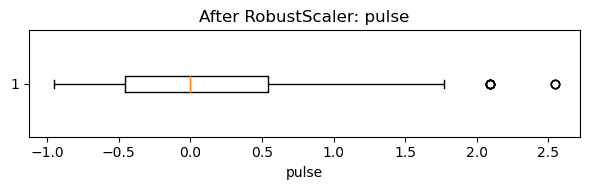

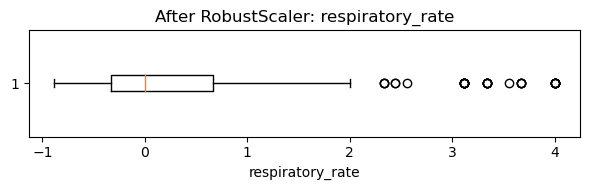

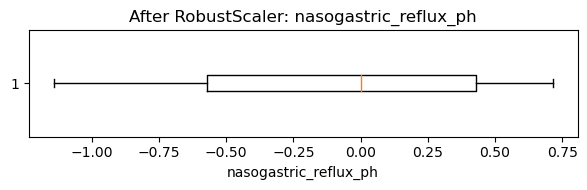

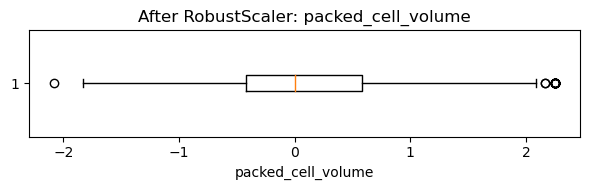

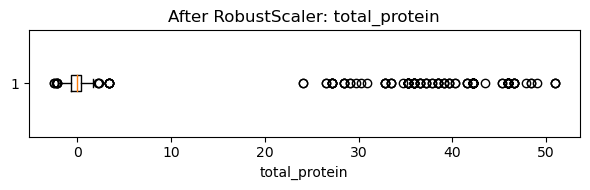

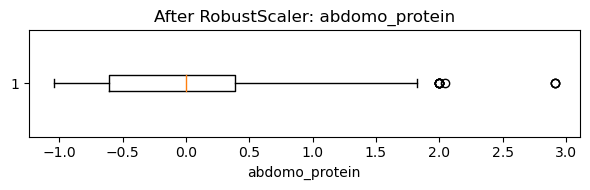

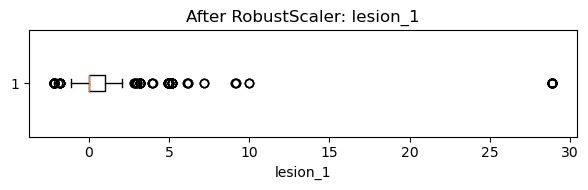

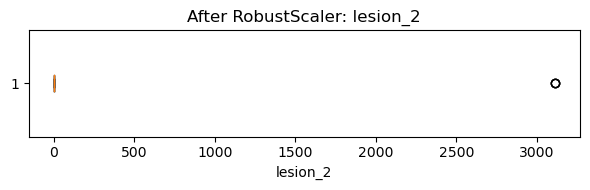

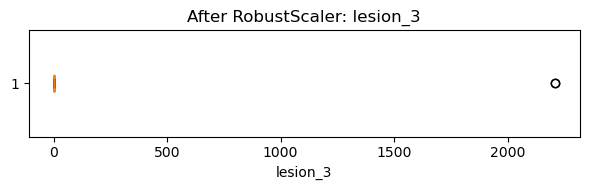

In [25]:
#  we do see some outliers after the plotting and visuallizing the data.
# I will be using RobustScaler, it helps by centering each feature on its median and dividing by the interquartile range
# which ignores the extreme tails
#That way, most of the data is squeezed into a common scale without letting outliers skew the center or spread.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_scaled = df.copy()
df_scaled[numerical] = scaler.fit_transform(df[numerical])


for col in numerical:
    plt.figure(figsize=(6,2))
    plt.boxplot(df_scaled[col].dropna(), vert=False)
    plt.title(f'After RobustScaler: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


##### Combining columns
By turning three sparse lesion‐code columns into a single “lesion_present” flag, it dramatically reduces feature dimensionality and eliminate hundreds of nearly empty categories. This makes the model learn the core signal (“any lesion?”) more robustly, cutting noise, speeding up training, and reducing overfitting.

In [26]:
df['lesion_present'] = (
    (df[['lesion_1','lesion_2','lesion_3']] > 0)
     .any(axis=1)
     .astype(int)
)

# 3. Drop the old high‐cardinality columns
df = df.drop(columns=['lesion_1','lesion_2','lesion_3'])

# 4. Quick check
print(df[['lesion_present']].value_counts())

lesion_present
1                 708
0                  63
Name: count, dtype: int64


In [27]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,outcome,lesion_present
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,no,died,1
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,no,euthanized,1
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,yes,lived,1
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,normal,normal,47.0,7.3,cloudy,2.6,no,yes,lived,0
5,no,adult,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,depressed,...,decreased,firm,49.0,8.0,cloudy,2.8,no,yes,lived,0


In [28]:
numerical = ['rectal_temp','pulse','respiratory_rate','nasogastric_reflux_ph','packed_cell_volume',
'total_protein','abdomo_protein','lesion_present']

#### log‑transforming each numeric feature

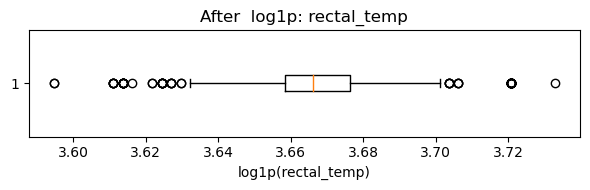

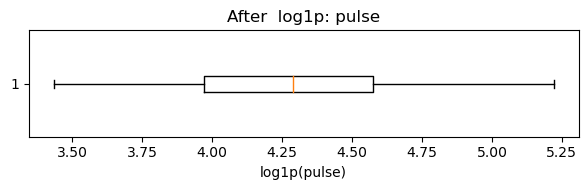

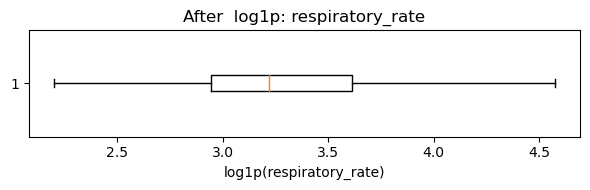

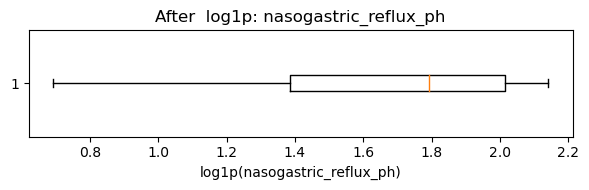

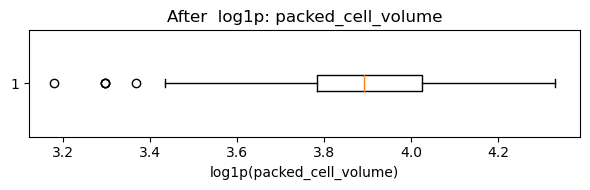

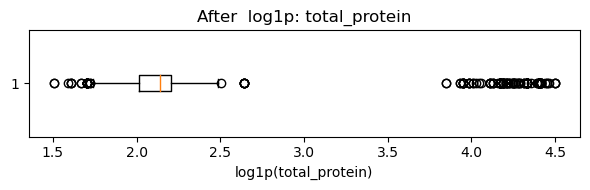

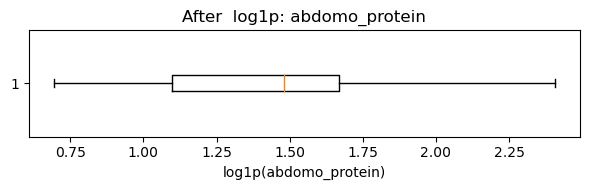

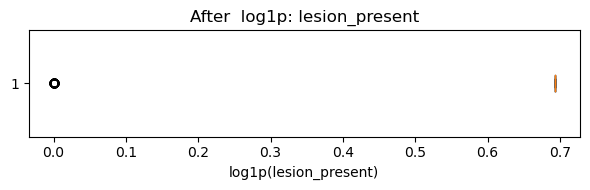

In [29]:
## I just also wanted to use log since robust scaling did not do much 
## log‑transforming each numeric feature with np.log1p,i.e. log(1+x) to tame skew and compress extreme values

df_log = df.copy()
for feat in numerical:
    df_log[feat] = np.log1p(df_log[feat])

for feat in numerical:
    plt.figure(figsize=(6,2))
    plt.boxplot(df_log[feat].dropna(), vert=False, showfliers=True)
    plt.title(f'After  log1p: {feat}')
    plt.xlabel(f'log1p({feat})')
    plt.tight_layout()
    plt.show()

### One-hot encoding

In [30]:
encode_cols=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 
             'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 
             'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']

In [31]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,outcome,lesion_present
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,no,died,1
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,no,euthanized,1
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,yes,lived,1
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,normal,normal,47.0,7.3,cloudy,2.6,no,yes,lived,0
5,no,adult,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,depressed,...,decreased,firm,49.0,8.0,cloudy,2.8,no,yes,lived,0


In [32]:
df = pd.get_dummies(df,
                        columns=encode_cols,
                        prefix_sep='_',
                        drop_first=False)

for col in df.columns:
    if any(col.startswith(f"{orig}_") for orig in encode_cols):
        df[col] = df[col].astype(int)


In [33]:
print("Encoded dataset shape:", df.shape)
display(df.head())
print(df.columns.tolist())

Encoded dataset shape: (771, 67)


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,outcome,lesion_present,surgery_no,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,38.1,132.0,24.0,6,57.0,8.5,3.4,died,1,0,...,0,0,0,0,0,1,0,1,1,0
1,37.5,88.0,12.0,2,33.0,64.0,2.0,euthanized,1,0,...,0,0,0,0,0,1,0,1,1,0
3,37.1,72.0,30.0,2,53.0,7.0,3.9,lived,1,0,...,0,0,0,0,1,0,0,1,0,1
4,38.0,52.0,48.0,7,47.0,7.3,2.6,lived,0,1,...,0,1,0,0,1,0,1,0,0,1
5,38.1,56.0,32.0,5,49.0,8.0,2.8,lived,0,1,...,1,0,0,0,1,0,1,0,0,1


['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'outcome', 'lesion_present', 'surgery_no', 'surgery_yes', 'age_adult', 'age_young', 'temp_of_extremities_cold', 'temp_of_extremities_cool', 'temp_of_extremities_normal', 'temp_of_extremities_warm', 'peripheral_pulse_absent', 'peripheral_pulse_increased', 'peripheral_pulse_normal', 'peripheral_pulse_reduced', 'mucous_membrane_bright_pink', 'mucous_membrane_bright_red', 'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink', 'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink', 'capillary_refill_time_3', 'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec', 'pain_alert', 'pain_depressed', 'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain', 'peristalsis_absent', 'peristalsis_hypermotile', 'peristalsis_hypomotile', 'peristalsis_normal', 'abdominal_distention_moderate', 'abdominal_distention_none', 'abdominal_distention_sever

In [34]:
train_cols = [c for c in df.columns if c not in ('outcome','outcome_encoded')]

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [35]:
# Properly encoding our target variable which is outcome: 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['outcome_encoded'] = le.fit_transform(df['outcome'])

# see the mapping
print("Classes:", le.classes_)
# e.g. array(['died','euthanized','lived'], dtype=object)
# so 'died'→0, 'euthanized'→1, 'lived'→2

print(df[['outcome','outcome_encoded']].head())


Classes: ['died' 'euthanized' 'lived']
      outcome  outcome_encoded
0        died                0
1  euthanized                1
3       lived                2
4       lived                2
5       lived                2


In [36]:
df = df.drop(columns=['outcome'])
# now df has only the numeric target outcome_encoded


In [37]:
df.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_present,surgery_no,surgery_yes,...,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes,outcome_encoded
0,38.1,132.0,24.0,6,57.0,8.5,3.4,1,0,1,...,0,0,0,0,1,0,1,1,0,0
1,37.5,88.0,12.0,2,33.0,64.0,2.0,1,0,1,...,0,0,0,0,1,0,1,1,0,1
3,37.1,72.0,30.0,2,53.0,7.0,3.9,1,0,1,...,0,0,0,1,0,0,1,0,1,2
4,38.0,52.0,48.0,7,47.0,7.3,2.6,0,1,0,...,1,0,0,1,0,1,0,0,1,2
5,38.1,56.0,32.0,5,49.0,8.0,2.8,0,1,0,...,0,0,0,1,0,1,0,0,1,2


## Train ML Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [39]:
X = df.drop(columns='outcome_encoded')

y = df['outcome_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluate Performance on Validation Sample

In [40]:
# Predict & compute metrics
y_pred_rf = rf.predict(X_test)
probas = rf.predict_proba(X_test)

# Calculate evaluation metrics for Random Forest
f1     = f1_score(       y_test_rf, y_pred_rf, average='micro', zero_division=0)
#average='micro': weights every example equally, a good number to report when you care about your model’s overall accuracy on imbalanced classes.
#zero_division=0: it just returns 0 instead of crashing or returning “nan.”


print("Random Forest Metrics:")
print(f'F1 Micro Score: {f1:.4f}')


Random Forest Metrics:
F1 Micro Score: 0.7328


## ROC curve

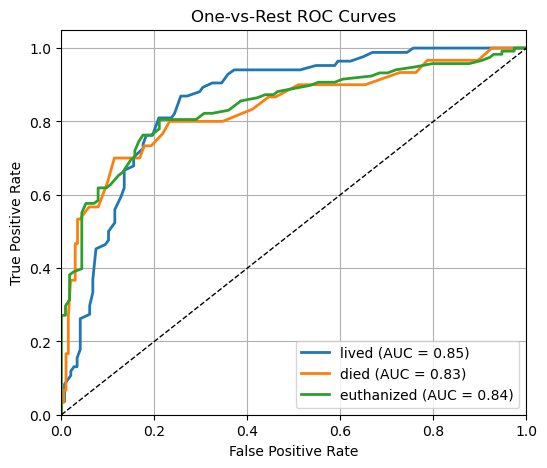

In [42]:
from sklearn.metrics import roc_curve, auc

class_names = ['lived','died','euthanized']
y_score = rf.predict_proba(X_test)

plt.figure(figsize=(6,5))

for i, name in enumerate(class_names):
    # building a binary true/false array for “is class i?”
    y_true_i  = (y_test_rf == i).astype(int)
    y_score_i = y_score[:, i]

    # compute ROC
    fpr, tpr, _ = roc_curve(y_true_i, y_score_i)
    roc_auc     = auc(fpr, tpr)

    # plot
    plt.plot(fpr, tpr, lw=2,
             label=f"{name} (AUC = {roc_auc:.2f})")

# chance line
plt.plot([0,1], [0,1], 'k--', lw=1)

plt.xlim(0,1)
plt.ylim(0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One‐vs‐Rest ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# All three curves sit well above the diagonal, showing the model separates each outcome reliably. 
# The AUCs (lived = 0.85, euthanized = 0.84, died = 0.83) mean it ranks true cases higher than false 
# about 83–85% of the time.

## GridSearchCV 
Using this to automatically try different hyperparameters of the Random Forest model above.



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble      import RandomForestClassifier
from sklearn.metrics       import f1_score, make_scorer, confusion_matrix

# 3) Parameter grid
param_grid = {
    'n_estimators':      [100, 200, 300],
    'max_depth':         [10, None],
    'min_samples_split': [5, 10],
    'class_weight':      ['balanced']   # helps with class imbalance
}

# 4) F1 scorer
micro_F1 = make_scorer(f1_score, average='micro', zero_division=0)

# 5) GridSearchCV ( 5-fold stratified since it was working best after trying other folds)
grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring=micro_F1,
    n_jobs=-1,
    verbose=1
)

# 6) Fit
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print(f"Best CV micro-F1: {grid.best_score_:.4f}\n")

# 7) Evaluate on the held-out test set
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Test micro-F1: {f1_score(y_test_rf, y_pred, average='micro'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best CV micro-F1: 0.6716

Test micro-F1: 0.7629
Confusion Matrix:
 [[69  2 13]
 [ 4 20  6]
 [19 11 88]]


### Confusion Matrix

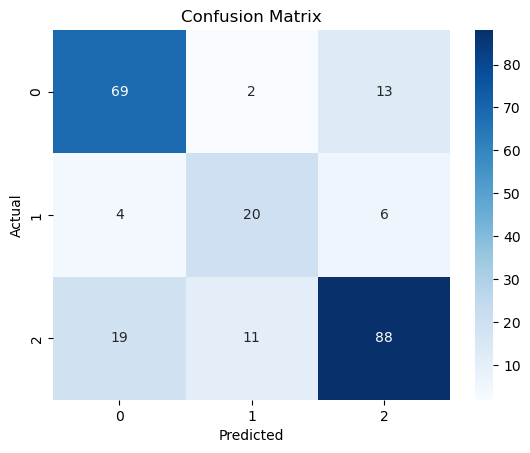

In [130]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Feature Importance Analysis


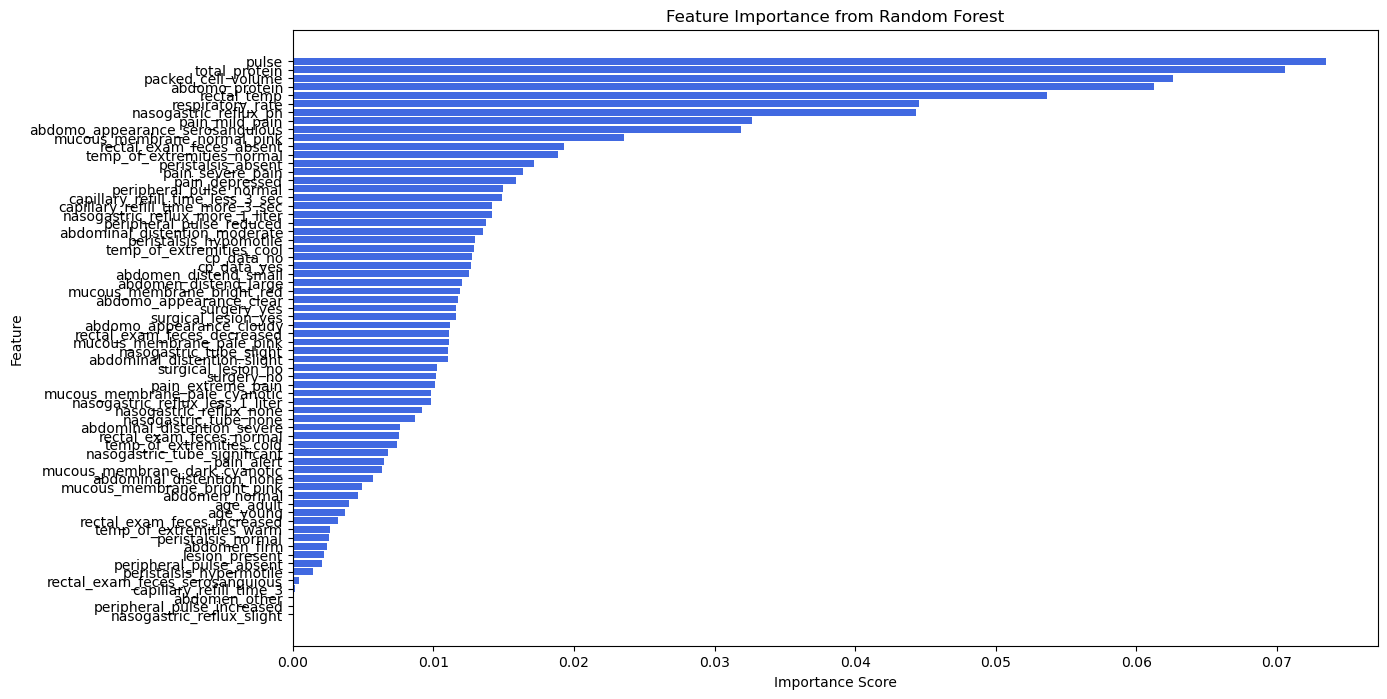

                            Feature  Importance
1                             pulse    0.073502
5                     total_protein    0.070574
4                packed_cell_volume    0.062637
6                    abdomo_protein    0.061251
0                       rectal_temp    0.053607
..                              ...         ...
53  rectal_exam_feces_serosanguious    0.000431
26          capillary_refill_time_3    0.000165
58                    abdomen_other    0.000101
17       peripheral_pulse_increased    0.000001
48        nasogastric_reflux_slight    0.000000

[66 rows x 2 columns]


In [131]:
# Feature Importance Analysis
# Just wanted to visually see if there is anything I can do with the columns but I do notice that;
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(14, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
print(importance_df)

In [46]:
# A few features are of very low importance but as for my prediction, it does not concern or affect it so I chose to leave those

### Trying more complex model- XGBoosting

In [48]:
from xgboost import XGBClassifier



X = df.drop('outcome_encoded', axis=1)
y = df['outcome_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using binary logistic for arrest
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

#training model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
y_pred = xg_clf.predict(X_test)


In [58]:
accuracy = accuracy_score(y_test, y_pred)
f1    = f1_score(       y_test, y_pred, average='micro', zero_division=0)


print(f'XGB score : ')
print(f"F1 Score: {f1:.4f}")


XGB score : 
F1 Score: 0.6645


In [ ]:
# The f1 score is still better in the RandomForest model so maybe just try one more model, a simpler one

### Trying a simpler model- Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics       import accuracy_score, precision_score, recall_score, f1_score

# 1) Instantiate the model
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    class_weight='balanced',
    max_iter=500,
    random_state=42
)

# 2) Train on  training data
logreg.fit(X_train, y_train)




/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=500,
                   multi_class='multinomial', random_state=42, solver='saga')

In [56]:
# 3) Predict on the test set
y_pred = logreg.predict(X_test)

# 4) Computing Micro-F1
f1_micro    = f1_score(       y_test, y_pred, average='micro', zero_division=0)

print("Logistic Regression Metrics:")
print(f"  F1 Micro : {f1_micro:.4f}")

Logistic Regression Metrics:
  F1 Micro : 0.6645


In [63]:
results = pd.DataFrame({
    'Model': [
        'Random Forest',
        'XGBoost',
        'Logistic Regression'],
    'F1 Micro Score': [
        0.7328,   # Random Forest
        0.6968,   # XGBoost
        0.6645    # Logistic Regression 
    ]})

results


,Model,F1 Micro Score
0,Random Forest,0.7328
1,XGBoost,0.6968
2,Logistic Regression,0.6645


### Final take on the models: 

 Overall the RandomForest ended up having the best micro-F1 score, so I will be using RF on the test dataset for prediction

# Apply ML to the challenge test set


In [142]:
import pandas as pd
import numpy as np

# rf     =  fitted RandomForestClassifier
# train_cols = list of columns that X_train_encoded had 

#  Preprocessing function (same as i did on train) 
def preprocess(df):
    df = df.copy()
    # collapse lesion codes
    df['lesion_present'] = df[['lesion_1','lesion_2','lesion_3']].gt(0).any(axis=1).astype(int)
    df.drop(columns=['lesion_1','lesion_2','lesion_3'], inplace=True)
    # log‐transform skewed numerics
    numeric_feats = [
        'rectal_temp','pulse','respiratory_rate',
        'nasogastric_reflux_ph','packed_cell_volume',
        'total_protein','abdomo_protein'
    ]
    for f in numeric_feats:
        df[f] = np.log1p(df[f])
    # one‐hot encode exactly the same cats + binaries
    encode_cols = [
        'surgery','age','temp_of_extremities','peripheral_pulse',
        'mucous_membrane','capillary_refill_time','pain','peristalsis',
        'abdominal_distention','nasogastric_tube','nasogastric_reflux',
        'rectal_exam_feces','abdomen','abdomo_appearance',
        'surgical_lesion','cp_data'
    ]
    df_enc = pd.get_dummies(df, columns=encode_cols, prefix_sep='_', drop_first=False)
    # cast dummies to int
    for c in df_enc.columns:
        if any(c.startswith(f"{col}_") for col in encode_cols):
            df_enc[c] = df_enc[c].astype(int)
    return df_enc




### Submission File

In [145]:
import pandas as pd
import numpy as np

# 1) Load & preprocess test exactly as train
test = pd.read_csv('test.csv')
test_enc = preprocess(test)    # use the same preprocess() defined for train

# 2) Align to the training columns
for c in train_cols:
    if c not in test_enc.columns:
        test_enc[c] = 0
test_enc = test_enc[train_cols]

# 3) Predict & map back
pred_codes = rf.predict(test_enc)
label_map  = {0:'lived', 1:'died', 2:'euthanized'}
test['outcome'] = [label_map[p] for p in pred_codes]

# 4) Writing submission
submission = test[['id','outcome']]
submission.to_csv('submission.csv', index=False)
print(" submission.csv written")


 submission.csv written


In [147]:
print(submission.shape, pd.read_csv('test.csv').shape)


(824, 2) (824, 28)
